In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
bs = pd.read_csv("HousingData.csv")
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
bs.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#drop ZN and CHAS
bs = bs.drop(["ZN", "CHAS"], axis = 1)
bs.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


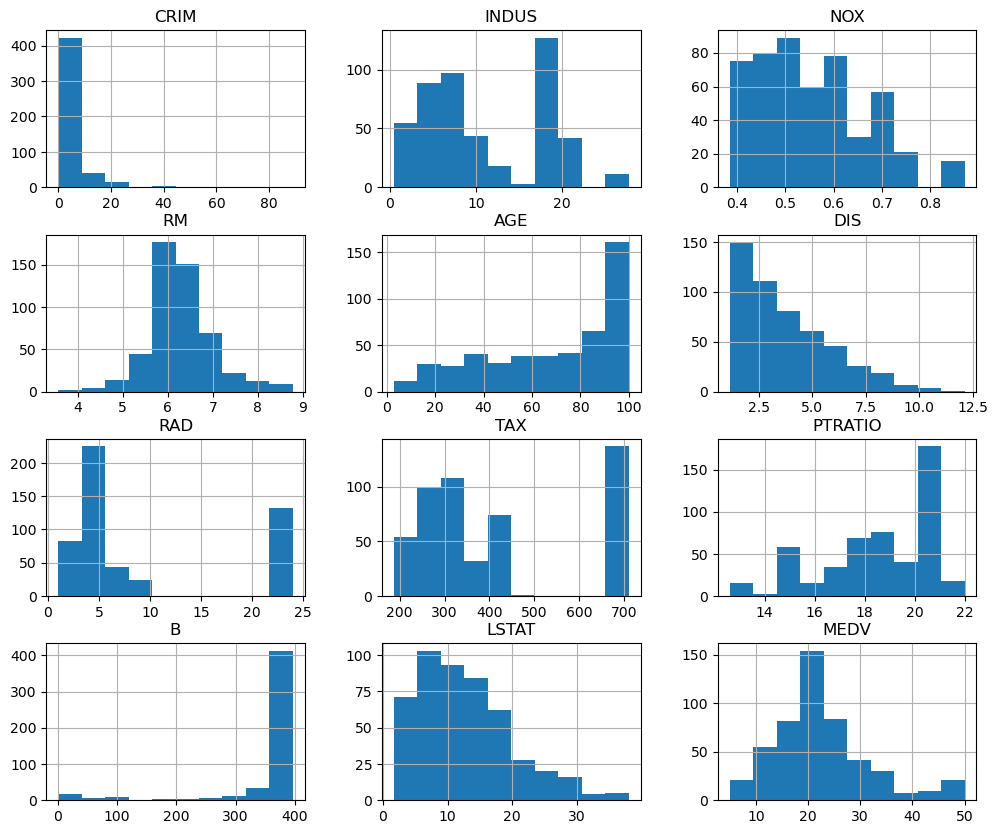

In [6]:
bs.hist(figsize=(12, 10))
plt.show()

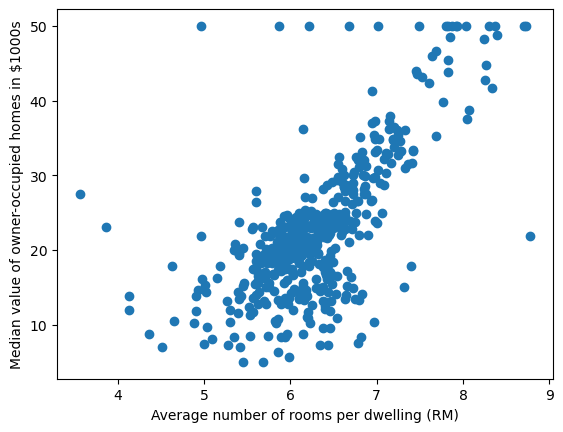

In [7]:
plt.scatter(bs['RM'], bs['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

In [8]:
corr = bs.corr()
corr

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.401863,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
INDUS,0.401863,1.000000,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
NOX,0.417130,0.764866,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,-0.390234,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,0.638431,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,-0.711709,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,0.604533,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,0.731055,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536
PTRATIO,0.281110,0.390954,0.188933,-0.355501,0.269226,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.375966,-0.507787
B,-0.381411,-0.360532,-0.380051,0.128069,-0.275303,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.369889,0.333461


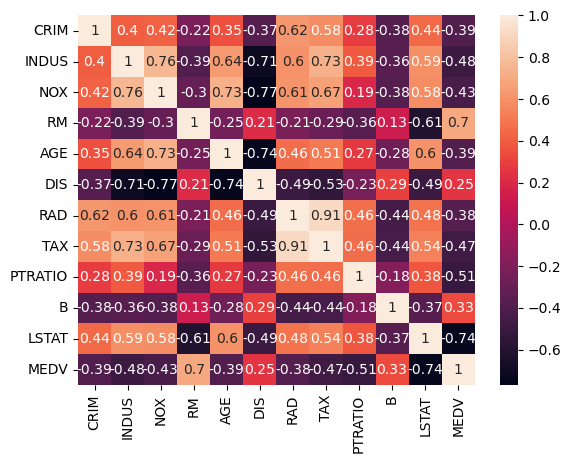

In [9]:
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
#the above correlation shows that medv is strongly related to RM AND LSTAT.
#It also shows a high correlation between RAD and TAX at 0.9. we avoid using them to avoid multicolineariy

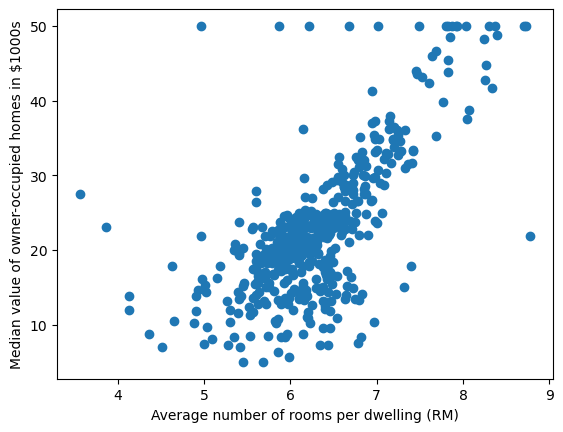

In [11]:
#scatter to show the relationship between the number of rooms and the price
plt.scatter(bs['RM'], bs['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

In [12]:
#the scatter shows that the more the number of rooms the higher the MEDV

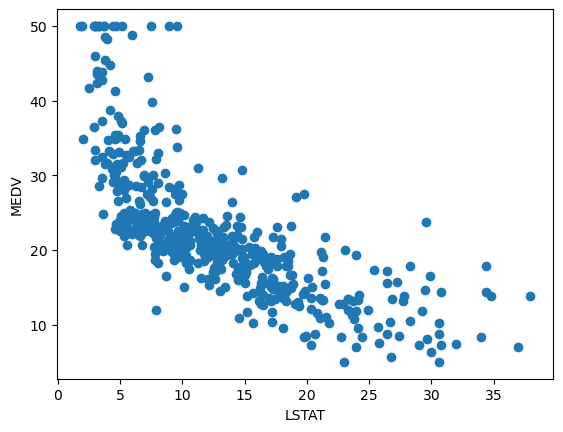

In [13]:
#relationship between LSTAT and MEDV
plt.scatter(bs['LSTAT'], bs['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [14]:
#the scatter shows that when the number of lower status population increases, the house prices decrease.

In [15]:
y = bs['MEDV']
X = bs.drop('MEDV', axis = 1)

In [16]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#replacing missing data with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [18]:
#fitting the model
model = LinearRegression()

In [19]:
model.fit(X_train_imputed, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test_imputed)


In [21]:
mse = mean_squared_error(y_test, y_pred)
mse

26.261356430209332

In [22]:
from sklearn import metrics
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.275935399874644
MSE: 26.261356430209332
RMSE: 5.124583537245669


In [23]:
#polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_imputed)
X_test_poly = poly_features.transform(X_test_imputed)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)


LinearRegression()

In [24]:
poly_predict = poly_lr.predict(X_test_poly)

In [25]:
mse = mean_squared_error(y_test, poly_predict)
mse

22.148260551373593

In [26]:
#ridge regression and lasso
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create Ridge and Lasso regression models
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

In [28]:
# Fit the models on the training data
ridge.fit(X_train_imputed, y_train)
lasso.fit(X_train_imputed, y_train)

Lasso(alpha=1)

In [29]:
# Make predictions on the testing data
y_pred_ridge = ridge.predict(X_test_imputed)
y_pred_lasso = lasso.predict(X_test_imputed)

In [30]:
# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Ridge):", mse_ridge)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Ridge): 26.602614333445143
Mean Squared Error (Lasso): 25.674803520883533


In [31]:
#support vector regression
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Create a support vector regression model (RBF kernel)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [33]:
# Fit the model on the training data
svr.fit(X_train_imputed, y_train)

SVR()

In [34]:
svr_pred = svr.predict(X_test_imputed)

In [35]:
mse = mean_squared_error(y_test, svr_pred)
mse

54.231377871010125

In [36]:
#Decision Tree Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
dtree = DecisionTreeRegressor(max_depth=3, random_state=42)

In [38]:
dtree.fit(X_train_imputed, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [39]:
dtree_pred = dtree.predict(X_test_imputed)

In [40]:
mse = mean_squared_error(y_test, dtree_pred)
mse

23.38565808120585

In [41]:
#Random Forest Regression
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

In [43]:
rf.fit(X_train_imputed, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [44]:
rf_pred = rf.predict(X_test_imputed)

In [45]:
mse= mean_squared_error(y_test, rf_pred)
mse

13.94354817327855

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [48]:
# Create a random forest regressor
rforest = RandomForestRegressor(random_state=42)


In [49]:
# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


In [50]:
# Fit the grid search to the data
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [51]:
# Print the best combination of hyperparameters and their score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 16.627971698000092
